**Import Libraries and Data**

In [27]:
import re # for regular expressions
import pandas as pd 
import tweepy
from textblob import TextBlob
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from numpy.random import RandomState

%matplotlib inline

In [28]:
consumer_key='O9h0Wptu1FOT6dndo0lfS1RqG'
consumer_secret='fM5MLtuOrgoy2WqaiHh9lU4jJCjmlVFBGXoBMMiQasZGBa5X5S'
access_token='1409953639121133571-JwiEnR09QqJxb2B9tWHsp0y8Lvjh2m'
access_token_secret='urVb7E2UuPeKmvyiX4BogPdjYTwF2G02QYN5Vxown1iXp'

In [29]:
try:
#Creating the authentication object
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#Setting your access token and secret
    auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
    api = tweepy.API(auth)

except:
    print("Error: Authentication Failed")

Reading train and test datasets.

In [30]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="covid19indiaorg", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) If you are building a tracker and have queries on how we went about it, you can reach out to us at hello@covid19india.org.
We will try our best to share our experiences and learnings with you.

(Hopefully) The show will go on!

Stay safe!

n/n

2) While we are not looking to handover the https://t.co/uPgYRVAG78 domain, we hope that our open source code, data repository and publicly available details of our operations will aid others to build alternate solutions.

3/n

3) The approach we took was specific to our context - the need to keep costs to zero, ease of operations for a volunteer driven group and rapid shipping of a minimum viable product. We urge others to take an approach that best suits their context and available resources.

2/n

4) We have summarized the technical details of our data operations in the below post 👇
https://t.co/yDJ6qusOLn

Individuals or orgs interested in building a Covid19 tracker/data repository for India, can use it as a hig

In [23]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"If you are building a tracker and have queries on how we went about it, you can reach out to us at hello@covid19india.org.\nWe will try our best to share our experiences and learnings with you.\n\..."
1,"While we are not looking to handover the https://t.co/uPgYRVAG78 domain, we hope that our open source code, data repository and publicly available details of our operations will aid others to buil..."
2,"The approach we took was specific to our context - the need to keep costs to zero, ease of operations for a volunteer driven group and rapid shipping of a minimum viable product. We urge others to..."
3,We have summarized the technical details of our data operations in the below post 👇\nhttps://t.co/yDJ6qusOLn\n\nIndividuals or orgs interested in building a Covid19 tracker/data repository for Ind...
4,@giridar100 @IefThink @ShamikaRavi @AskDrShashank @nvcmenon @icart_india @IDFCinstitute @DevanVarun @abeynaya @tanishaaaa124 @xMohakGupta @_devarsh_patel @PratikMandlech2 @NeuroRishika The bulleti...


In [2]:
train = pd.read_csv('train.csv',encoding = "ISO-8859-1")
test = pd.read_csv('test.csv',encoding = "ISO-8859-1")

**Text PreProcessing and Cleaning**

Displaying First 10 Negative Tweets

In [3]:
train[train['label'] == 0].head(10)

,id,text,svalue,label
2,3,"When there are CLUSTERS OF #COVID19 cases, to stop transmission &amp; prevent spread:\r\n<U+0001F52C>Test suspect cases per WHO case https://t.co/FFY95r2VJs",-0.368951,0
3,4,COVID -19 has brought to the forefront a concern that already was brewing in some sectors - supply chain disruption https://t.co/llJfBnZlb0,-0.301869,0
5,6,"How woefully behind is the US in #COVID19 testing? The US has performed 5 coronavirus tests per million people, co https://t.co/J4ktD9elDm",-0.109109,0
6,7,A sober and somewhat calming assessment of #COVID19 \r\n\r\nhttps://t.co/93EqbMhKKI\r\n#coronavirus \r\n#WuhanVirus \r\n#WuhanCoronavirus,-0.028868,0
8,9,On https://t.co/4zZsRQhzov Listen now Go Fight Remix by Cat Hall Angeles @2_dissonance on https://t.co/C2Tndc5JIu T https://t.co/ofXjHPqHsV,-0.229416,0
9,10,"Translation: ""There just have to be more cases in Africa than we know about. Bc it's Africa and terrible things com https://t.co/EgWIodcn8z",-0.156386,0
10,11,Getting seriously concerned for these @Phillies #OpeningDay tix. @MLB \r\n#COVID19 #coronavirus,-0.325632,0
16,17,"Coronavirus Cancellations: Festivals, Concerts, Tours Affected by the Outbreak https://t.co/anjWaJ7iqu #Coachella https://t.co/l0eNHfIWXT",-0.213809,0
18,19,If you're under the age of 50 and catch covid19 then you probably wouldn't notice apart from the media hype around https://t.co/zuPxV0CilQ,-0.106600,0
19,20,"Katakot talaga COVID19, Keep safe everyone!!! Wear yo mask at all times and always wash your hands avoid crowded pl https://t.co/bS4veaipZS",-0.074620,0


Displaying First 10 Positive Tweets

In [4]:
train[train['label'] == 1].head(10)

,id,text,svalue,label
0,1,@NormOrnstein @danpfeiffer That WAS her Trump Administration job interview!! The new White House narrative:\r\n1. Blam https://t.co/LAeRqEfNZZ,0.266789,1
1,2,"@WalkerBragman He needs heart surgery and he's putting it off to campaign. If he gets covid19, that's it for him. https://t.co/OZj3MPXiBT",0.000000,1
4,5,@supportivemom0 traveling to nasa lauch station #COVID2019 #COVID<U+30FC>19 #COVID19 https://t.co/Wx60UPqIZz,0.000000,1
7,8,Good! #COVID19 https://t.co/yxqmCUZG0k,0.375000,1
11,12,sure self-isolation is an easy way to prevent illness from spreading. but its only possible when you have the infra https://t.co/YrjVkB2HLO,0.093808,1
12,13,This #COVID19 thingy could result in a whole new crop of Boomers<U+0001F609>,0.230940,1
13,14,Prayer is our weapon against COVID19,0.000000,1
14,15,<U+2066>@Harvard<U+2069> has told all students not to return after spring break on March 23rd.\r\n\r\nThere 100+ colleges &amp; universitie https://t.co/bQY7K6Qzz8,0.057354,1
15,16,Is This #CoVid19 THE Big Event? - Questions For Corbett https://t.co/jSrCEDbPUf,0.075378,1
17,18,"If you live or work (especially in PR/comms) in Central Florida, you should be following @NaseemMiller as shes bee https://t.co/Gl6A9DQpsP",0.095940,1


Dimensions of the train and test dataset.

In [5]:
train.shape, test.shape

((140000, 4), (60000, 4))

In [6]:
train["label"].value_counts()

1    82245
0    57755
Name: label, dtype: int64

Distribution of length of the tweets, in terms of words, in both train and test data.

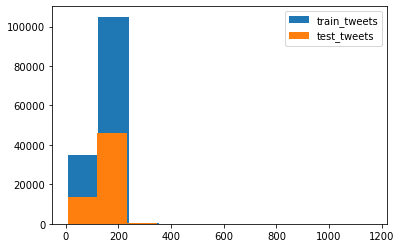

In [7]:
length_train = train['text'].str.len()
length_test = test['text'].str.len()

plt.hist(length_train, bins=10, label="train_tweets")
plt.hist(length_test, bins=10, label="test_tweets")
plt.legend()
plt.show()

**Data Cleaning**

In [8]:
df = train.append(test, ignore_index=True)
df.shape

(200000, 5)

User-defined function to remove unwanted text patterns from the tweets.

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [31]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"If you are building a tracker and have queries on how we went about it, you can reach out to us at hello19india.org.\nWe will try our best to share our experiences and learnings with you.\n\n(Hope..."
1,"While we are not looking to handover the domain, we hope that our open source code, data repository and publicly available details of our operations will aid others to build alternate solutions.\..."
2,"The approach we took was specific to our context - the need to keep costs to zero, ease of operations for a volunteer driven group and rapid shipping of a minimum viable product. We urge others to..."
3,"We have summarized the technical details of our data operations in the below post 👇\n\n\nIndividuals or orgs interested in building a Covid19 tracker/data repository for India, can use it as a hig..."
4,100 _india 124 @_devarsh_patel 2 The bulletin formats have stabilized now. So we do not expect them to change often like they used to during the initial days.
...,...
95,_harsh We are there till October. Let's see how the pandemic plays out by then. Stay safe!
96,Thanks for the message. Inspiring words!
97,Thanks Ganesh.
98,Thank you Vidhu.


In [32]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"If you are building a tracker and have queries on how we went about it, you can reach out to us at hello19india.org.\nWe will try our best to share our experiences and learnings with you.\n\n(Hope...",0.400,0.812500
1,"While we are not looking to handover the domain, we hope that our open source code, data repository and publicly available details of our operations will aid others to build alternate solutions.\...",0.300,0.133333
2,"The approach we took was specific to our context - the need to keep costs to zero, ease of operations for a volunteer driven group and rapid shipping of a minimum viable product. We urge others to...",0.275,0.466667
3,"We have summarized the technical details of our data operations in the below post 👇\n\n\nIndividuals or orgs interested in building a Covid19 tracker/data repository for India, can use it as a hig...",0.380,0.136667
4,100 _india 124 @_devarsh_patel 2 The bulletin formats have stabilized now. So we do not expect them to change often like they used to during the initial days.,0.000,0.000000
...,...,...,...
95,_harsh We are there till October. Let's see how the pandemic plays out by then. Stay safe!,0.600,0.212500
96,Thanks for the message. Inspiring words!,0.600,0.412500
97,Thanks Ganesh.,0.200,0.200000
98,Thank you Vidhu.,0.000,0.000000


In [33]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"If you are building a tracker and have queries on how we went about it, you can reach out to us at hello19india.org.\nWe will try our best to share our experiences and learnings with you.\n\n(Hope...",0.400,0.812500,Positive
1,"While we are not looking to handover the domain, we hope that our open source code, data repository and publicly available details of our operations will aid others to build alternate solutions.\...",0.300,0.133333,Positive
2,"The approach we took was specific to our context - the need to keep costs to zero, ease of operations for a volunteer driven group and rapid shipping of a minimum viable product. We urge others to...",0.275,0.466667,Positive
3,"We have summarized the technical details of our data operations in the below post 👇\n\n\nIndividuals or orgs interested in building a Covid19 tracker/data repository for India, can use it as a hig...",0.380,0.136667,Positive
4,100 _india 124 @_devarsh_patel 2 The bulletin formats have stabilized now. So we do not expect them to change often like they used to during the initial days.,0.000,0.000000,Neutral
...,...,...,...,...
95,_harsh We are there till October. Let's see how the pandemic plays out by then. Stay safe!,0.600,0.212500,Positive
96,Thanks for the message. Inspiring words!,0.600,0.412500,Positive
97,Thanks Ganesh.,0.200,0.200000,Positive
98,Thank you Vidhu.,0.000,0.000000,Neutral


**1. Removing Twitter Handles (@user)**

In [10]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*") 
df.head()

,id,text,svalue,label,ï»¿id,tidy_tweet
0,1.0,@NormOrnstein @danpfeiffer That WAS her Trump Administration job interview!! The new White House narrative:\r\n1. Blam https://t.co/LAeRqEfNZZ,0.266789,1,NaN,That WAS her Trump Administration job interview!! The new White House narrative:\r\n1. Blam https://t.co/LAeRqEfNZZ
1,2.0,"@WalkerBragman He needs heart surgery and he's putting it off to campaign. If he gets covid19, that's it for him. https://t.co/OZj3MPXiBT",0.000000,1,NaN,"He needs heart surgery and he's putting it off to campaign. If he gets covid19, that's it for him. https://t.co/OZj3MPXiBT"
2,3.0,"When there are CLUSTERS OF #COVID19 cases, to stop transmission &amp; prevent spread:\r\n<U+0001F52C>Test suspect cases per WHO case https://t.co/FFY95r2VJs",-0.368951,0,NaN,"When there are CLUSTERS OF #COVID19 cases, to stop transmission &amp; prevent spread:\r\n<U+0001F52C>Test suspect cases per WHO case https://t.co/FFY95r2VJs"
3,4.0,COVID -19 has brought to the forefront a concern that already was brewing in some sectors - supply chain disruption https://t.co/llJfBnZlb0,-0.301869,0,NaN,COVID -19 has brought to the forefront a concern that already was brewing in some sectors - supply chain disruption https://t.co/llJfBnZlb0
4,5.0,@supportivemom0 traveling to nasa lauch station #COVID2019 #COVID<U+30FC>19 #COVID19 https://t.co/Wx60UPqIZz,0.000000,1,NaN,traveling to nasa lauch station #COVID2019 #COVID<U+30FC>19 #COVID19 https://t.co/Wx60UPqIZz


**2. Removing Punctuations, Numbers, and Special Characters**

In [12]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head(10)

<ipython-input-12-422e9ad49b18>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,text,svalue,label,ï»¿id,tidy_tweet
0,1.0,@NormOrnstein @danpfeiffer That WAS her Trump Administration job interview!! The new White House narrative:\r\n1. Blam https://t.co/LAeRqEfNZZ,0.266789,1,NaN,That WAS her Trump Administration job interview The new White House narrative Blam https t co LAeRqEfNZZ
1,2.0,"@WalkerBragman He needs heart surgery and he's putting it off to campaign. If he gets covid19, that's it for him. https://t.co/OZj3MPXiBT",0.000000,1,NaN,He needs heart surgery and he s putting it off to campaign If he gets covid that s it for him https t co OZj MPXiBT
2,3.0,"When there are CLUSTERS OF #COVID19 cases, to stop transmission &amp; prevent spread:\r\n<U+0001F52C>Test suspect cases per WHO case https://t.co/FFY95r2VJs",-0.368951,0,NaN,When there are CLUSTERS OF #COVID cases to stop transmission amp prevent spread U F C Test suspect cases per WHO case https t co FFY r VJs
3,4.0,COVID -19 has brought to the forefront a concern that already was brewing in some sectors - supply chain disruption https://t.co/llJfBnZlb0,-0.301869,0,NaN,COVID has brought to the forefront a concern that already was brewing in some sectors supply chain disruption https t co llJfBnZlb
4,5.0,@supportivemom0 traveling to nasa lauch station #COVID2019 #COVID<U+30FC>19 #COVID19 https://t.co/Wx60UPqIZz,0.000000,1,NaN,traveling to nasa lauch station #COVID #COVID U FC #COVID https t co Wx UPqIZz
5,6.0,"How woefully behind is the US in #COVID19 testing? The US has performed 5 coronavirus tests per million people, co https://t.co/J4ktD9elDm",-0.109109,0,NaN,How woefully behind is the US in #COVID testing The US has performed coronavirus tests per million people co https t co J ktD elDm
6,7.0,A sober and somewhat calming assessment of #COVID19 \r\n\r\nhttps://t.co/93EqbMhKKI\r\n#coronavirus \r\n#WuhanVirus \r\n#WuhanCoronavirus,-0.028868,0,NaN,A sober and somewhat calming assessment of #COVID https t co EqbMhKKI #coronavirus #WuhanVirus #WuhanCoronavirus
7,8.0,Good! #COVID19 https://t.co/yxqmCUZG0k,0.375000,1,NaN,Good #COVID https t co yxqmCUZG k
8,9.0,On https://t.co/4zZsRQhzov Listen now Go Fight Remix by Cat Hall Angeles @2_dissonance on https://t.co/C2Tndc5JIu T https://t.co/ofXjHPqHsV,-0.229416,0,NaN,On https t co zZsRQhzov Listen now Go Fight Remix by Cat Hall Angeles on https t co C Tndc JIu T https t co ofXjHPqHsV
9,10.0,"Translation: ""There just have to be more cases in Africa than we know about. Bc it's Africa and terrible things com https://t.co/EgWIodcn8z",-0.156386,0,NaN,Translation There just have to be more cases in Africa than we know about Bc it s Africa and terrible things com https t co EgWIodcn z


**3. Removing Short Words**

In [13]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [14]:
df.head()

,id,text,svalue,label,ï»¿id,tidy_tweet
0,1.0,@NormOrnstein @danpfeiffer That WAS her Trump Administration job interview!! The new White House narrative:\r\n1. Blam https://t.co/LAeRqEfNZZ,0.266789,1,NaN,That Trump Administration interview White House narrative Blam https LAeRqEfNZZ
1,2.0,"@WalkerBragman He needs heart surgery and he's putting it off to campaign. If he gets covid19, that's it for him. https://t.co/OZj3MPXiBT",0.000000,1,NaN,needs heart surgery putting campaign gets covid that https MPXiBT
2,3.0,"When there are CLUSTERS OF #COVID19 cases, to stop transmission &amp; prevent spread:\r\n<U+0001F52C>Test suspect cases per WHO case https://t.co/FFY95r2VJs",-0.368951,0,NaN,When there CLUSTERS #COVID cases stop transmission prevent spread Test suspect cases case https
3,4.0,COVID -19 has brought to the forefront a concern that already was brewing in some sectors - supply chain disruption https://t.co/llJfBnZlb0,-0.301869,0,NaN,COVID brought forefront concern that already brewing some sectors supply chain disruption https llJfBnZlb
4,5.0,@supportivemom0 traveling to nasa lauch station #COVID2019 #COVID<U+30FC>19 #COVID19 https://t.co/Wx60UPqIZz,0.000000,1,NaN,traveling nasa lauch station #COVID #COVID #COVID https UPqIZz


**4. Text Normalization**

Used nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [15]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [16]:
tokenized_tweet.head()

0                                  [That, Trump, Administration, interview, White, House, narrative, Blam, https, LAeRqEfNZZ]
1                                                [needs, heart, surgery, putting, campaign, gets, covid, that, https, MPXiBT]
2              [When, there, CLUSTERS, #COVID, cases, stop, transmission, prevent, spread, Test, suspect, cases, case, https]
3    [COVID, brought, forefront, concern, that, already, brewing, some, sectors, supply, chain, disruption, https, llJfBnZlb]
4                                                    [traveling, nasa, lauch, station, #COVID, #COVID, #COVID, https, UPqIZz]
Name: tidy_tweet, dtype: object

Normalizing the tokenized tweets.

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Combining tokens back together.

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['tidy_tweet'] = tokenized_tweet

# **Visualization from Tweets**

**A)Combined WordCloud**

In [19]:
!pip install -U wordcloud

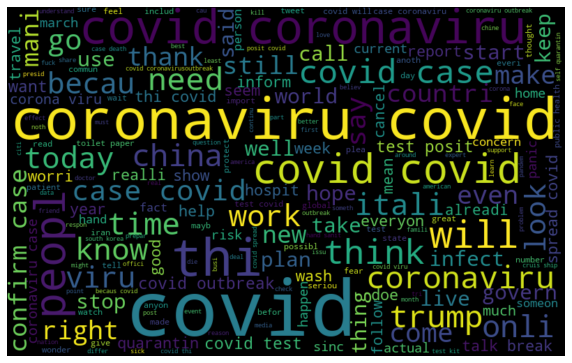

In [20]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**B) Words in Negative tweets**

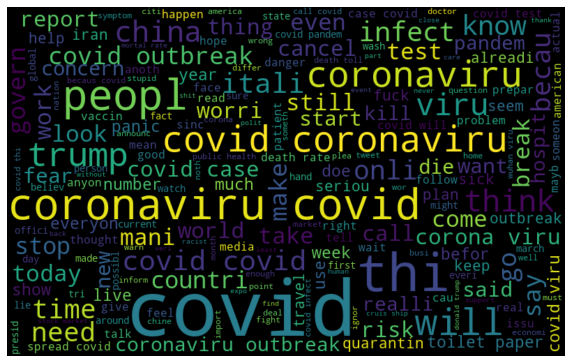

In [21]:
normal_words =' '.join([text for text in df['tidy_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**C)Words in Positive Tweets**

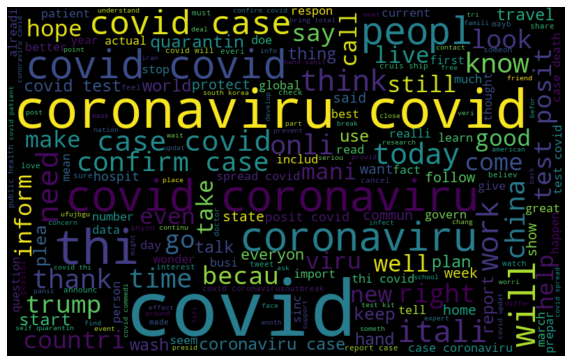

In [22]:
negative_words = ' '.join([text for text in df['tidy_tweet'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# extracting hashtags from negative tweets

HT_regular = hashtag_extract(df['tidy_tweet'][df['label'] == 0])

# extracting hashtags from positive tweets
HT_negative = hashtag_extract(df['tidy_tweet'][df['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Negative Tweets**

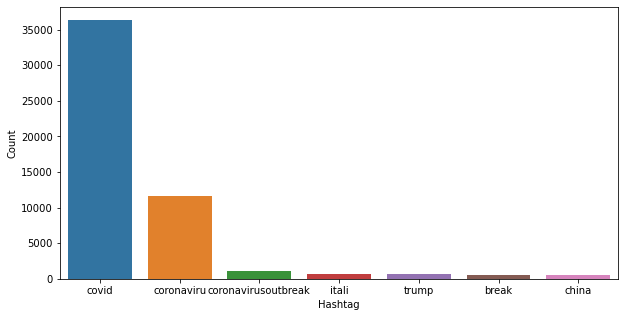

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 7) 
plt.figure(figsize=(10,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Positive Tweets**

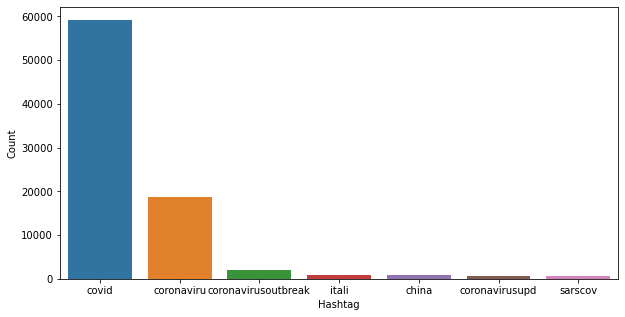

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 7)   
plt.figure(figsize=(10,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

# **Extracting Features from Cleaned Tweets**

In [29]:
!pip install -U gensim

In [31]:
pip install --upgrade gensim

In [32]:
pip install "gensim==4.0.1"

In [33]:
!pip install -forge gensim

Looking in links: orge


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

C:\Users\Dell\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [35]:
pip install python-Levenshtein

  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Running setup.py clean for python-Levenshtein
Failed to build python-Levenshtein
    Running setup.py install for python-Levenshtein: started
    Running setup.py install for python-Levenshtein: finished with status 'error'



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Dell\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-boqqcgdt\\python-levenshtein_e3048a0f37cd47ef80b39162ed43d24e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-boqqcgdt\\python-levenshtein_e3048a0f37cd47ef80b39162ed43d24e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Dell\AppData\Local\Temp\pip-wheel-2gtaot5x'
       cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-boqqcgdt\python-levenshtein_e3048a0f37cd47ef80b39162ed43d24e\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\StringMatcher.

**Bag-of-Words Features**

In [36]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=200, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])
bow.shape

(200000, 200)

**TF-IDF Features**

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=200, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet'])
tfidf.shape

(200000, 200)

# **Word Embeddings**

**1. Word2Vec Embeddings**

In [38]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df['tidy_tweet']), epochs=20)

(33330991, 45408920)

In [39]:
model_w2v.wv.most_similar(positive="coronaviru")

[('#coronaviru', 0.7510924935340881),
 ('#covid', 0.6976369023323059),
 ('covid', 0.6953792572021484),
 ('http', 0.6556195020675659),
 ('coronavir', 0.6372671723365784),
 ('viru', 0.6263020634651184),
 ('rqqu', 0.6142076849937439),
 ('ansa', 0.6077152490615845),
 ('involvi', 0.6073126196861267),
 ('gocv', 0.6016605496406555)]

In [40]:
model_w2v.wv['coronaviru']

array([ 0.03835862, -0.03010918, -0.15625484,  0.6726731 , -0.2982041 ,
        0.33004418,  0.3715082 , -0.08641165, -0.00720095,  0.22825128,
        0.03103925,  0.33120546, -0.24994305,  0.15655825,  0.4567163 ,
        0.5012579 ,  0.18250182, -0.22959769, -0.2630598 , -0.2756668 ,
       -0.09952307, -0.08971334, -0.36576033,  0.11062606, -0.19108035,
        0.13357295, -0.17013565,  0.23296988,  0.10523582, -0.11654538,
        0.46757302, -0.48619545, -0.70998275,  0.19393182,  0.3338294 ,
        0.08267067,  0.355978  ,  0.15788843,  0.04039786,  0.18523242,
       -0.57063603,  0.00366144, -0.00439478,  0.17648749, -0.11477719,
        0.43322647,  0.4567227 , -0.23976552, -0.28115183, -0.02934936,
       -0.09025396, -0.08292336,  0.32998002,  0.34171224, -0.11253349,
        0.45958453, -0.27487466,  0.06052687,  0.01756743,  0.14802752,
       -0.40207225,  0.19976865,  0.55658656,  0.1332199 ,  0.17891042,
        0.09887674,  0.07110228,  0.0330097 , -0.0282547 , -0.25

In [41]:
len(model_w2v.wv['coronaviru']) #The length of the vector is 100|

100

**Preparing Vectors for Tweets**

In [42]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set

In [43]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(200000, 100)

In [44]:
pip install "gensim==3.8.1"

  Using cached gensim-3.8.1-cp38-cp38-win_amd64.whl
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-uninstall-zzvu5k3q\\_matutils.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



**2. Doc2Vec Embedding**

Load the required libraries.

In [45]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.deprecated.doc2vec import LabeledSentence
LabeledSentence = gensim.models.deprecated.doc2vec.LabeledSentence

To implement doc2vec, we have to labelise the tweet with unique IDs using Gensim’s LabeledSentence() function.

In [46]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [47]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

Result:After Labelising

In [48]:
labeled_tweets[:6]

[LabeledSentence(words=['that', 'trump', 'administr', 'interview', 'white', 'hous', 'narr', 'blam', 'http', 'laerqefnzz'], tags=['tweet_0']),
 LabeledSentence(words=['need', 'heart', 'surgeri', 'put', 'campaign', 'get', 'covid', 'that', 'http', 'mpxibt'], tags=['tweet_1']),
 LabeledSentence(words=['when', 'there', 'cluster', '#covid', 'case', 'stop', 'transmiss', 'prevent', 'spread', 'test', 'suspect', 'case', 'case', 'http'], tags=['tweet_2']),
 LabeledSentence(words=['covid', 'brought', 'forefront', 'concern', 'that', 'alreadi', 'brew', 'some', 'sector', 'suppli', 'chain', 'disrupt', 'http', 'lljfbnzlb'], tags=['tweet_3']),
 LabeledSentence(words=['travel', 'nasa', 'lauch', 'station', '#covid', '#covid', '#covid', 'http', 'upqizz'], tags=['tweet_4']),
 LabeledSentence(words=['woefulli', 'behind', '#covid', 'test', 'perform', 'coronaviru', 'test', 'million', 'peopl', 'http', 'eldm'], tags=['tweet_5'])]

Training a doc2vec model.

In [49]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=2, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|█████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 1946967.77it/s]


In [50]:
model_d2v.train(labeled_tweets, total_examples= len(df['tidy_tweet']), epochs=15)

**Preparing doc2vec Feature Set**

In [51]:
docvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(df)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,100))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(200000, 100)

# **Model Building**

Building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. The following algorithms are used to build models:

In [52]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve

**1. Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

**Bag-of-Words Features**

In [54]:
train_bow = bow[:140000,:]
test_bow = bow[60000:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

In [55]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_bog = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
pred_bog = prediction[:,1]
f1_score(yvalid, prediction_bog) # calculating f1 score

0.7731921707022188

**TF-IDF Features**

In [56]:
train_tfidf = tfidf[:140000,:]
test_tfidf = tfidf[60000:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [57]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7724881641241452

**Word2Vec Features**

In [58]:
train_w2v = wordvec_df.iloc[:140000,:]
test_w2v = wordvec_df.iloc[60000:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [59]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_w2v = prediction[:,1] >= 0.3
pred_w2v = prediction[:,1]
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_w2v)

0.7683241372555423

**Doc2Vec Features**

In [60]:
train_d2v = docvec_df.iloc[:140000,:]
test_d2v = docvec_df.iloc[60000:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [61]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7567311637890218

**2. Support Vector Machine**

In [62]:
from sklearn import svm

**Bag-of-Words Features**

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [ ]:
fper, tper, thresholds = roc_curve(yvalid, prediction_int) 
plot_roc_cur(fper, tper)

**TF-IDF Features**

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

**Word2Vec Features**

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

**Doc2Vec Features**

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

**3. RandomForest**

In [63]:
from sklearn.ensemble import RandomForestClassifier

**Bag-of-Words Features**

In [71]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.756230306502435

**TF-IDF Features**

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

**Word2Vec Features**

In [65]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction_RF_W2V = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction_RF_W2V)

0.7918777943368107

**Doc2Vec Features**

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

**ROC Curve for top 3 results**

**Random Forest Word to Vector -- 79.29%**

**Logistic Regression word to vector -- 77.61**

**Logistic Regression Bag of words -- 77.31**

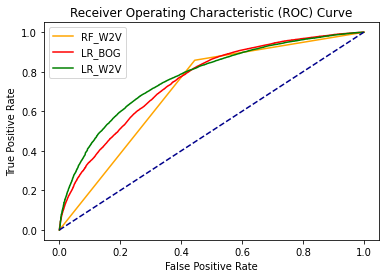

In [66]:
fper, tper, thresholds = roc_curve(yvalid, prediction_RF_W2V) 
fper1, tper1, thresholds = roc_curve(yvalid, pred_bog)
fper2, tper2, thresholds = roc_curve(yvalid, pred_w2v)
plt.plot(fper, tper, color='orange', label='RF_W2V')
plt.plot(fper1, tper1, color='red', label='LR_BOG')
plt.plot(fper2, tper2, color='green', label='LR_W2V')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()